problem definition --
This dataset utilizes data from 2014 Major League Baseball seasons in order to develop an algorithm that predicts the number of 
wins for a given team in the 2015 season based on several different indicators of success.
There are 16 different features that will be used as the inputs to the machine learning and the output will be a value that 
represents the number of wins. 
-- Input features: Runs, At Bats, Hits, Doubles, Triples, Homeruns, Walks, Strikeouts,Stolen Bases, Runs Allowed, Earned Runs, 
Earned Run Average (ERA), Shutouts, Saves, and Errors
-- Output: Number of predicted wins (W)
- General Approach: For predicting the number of wins a baseball team will attain -- based on the given input features, a linear regression approach is neccessary. (So we approach Linear Regression model here)

In [1]:
import numpy as np
import pandas as pd
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import zscore
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn import preprocessing 
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor

In [2]:
#load data set from github
df = pd.read_csv('BaseBallCaseStudy.csv')
df

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86
5,93,891,5509,1480,308,17,232,570,1151,88,670,609,3.80,7,10,34,88
6,87,764,5567,1397,272,19,212,554,1227,63,698,652,4.03,3,4,48,93
7,81,713,5485,1370,246,20,217,418,1331,44,693,646,4.05,0,10,43,77
8,80,644,5485,1383,278,32,167,436,1310,87,642,604,3.74,1,12,60,95
9,78,748,5640,1495,294,33,161,478,1148,71,753,694,4.31,3,10,40,97


In [3]:
df.head()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86


In [4]:
df.tail()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
25,92,667,5385,1346,263,26,187,563,1258,59,595,553,3.44,6,21,47,75
26,84,696,5565,1486,288,39,136,457,1159,93,627,597,3.72,7,18,41,78
27,79,720,5649,1494,289,48,154,490,1312,132,713,659,4.04,1,12,44,86
28,74,650,5457,1324,260,36,148,426,1327,82,731,655,4.09,1,6,41,92
29,68,737,5572,1479,274,49,186,388,1283,97,844,799,5.04,4,4,36,95


In [5]:
df.dtypes

W        int64
R        int64
AB       int64
H        int64
2B       int64
3B       int64
HR       int64
BB       int64
SO       int64
SB       int64
RA       int64
ER       int64
ERA    float64
CG       int64
SHO      int64
SV       int64
E        int64
dtype: object

In [6]:
df.columns

Index(['W', 'R', 'AB', 'H', '2B', '3B', 'HR', 'BB', 'SO', 'SB', 'RA', 'ER',
       'ERA', 'CG', 'SHO', 'SV', 'E'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   W       30 non-null     int64  
 1   R       30 non-null     int64  
 2   AB      30 non-null     int64  
 3   H       30 non-null     int64  
 4   2B      30 non-null     int64  
 5   3B      30 non-null     int64  
 6   HR      30 non-null     int64  
 7   BB      30 non-null     int64  
 8   SO      30 non-null     int64  
 9   SB      30 non-null     int64  
 10  RA      30 non-null     int64  
 11  ER      30 non-null     int64  
 12  ERA     30 non-null     float64
 13  CG      30 non-null     int64  
 14  SHO     30 non-null     int64  
 15  SV      30 non-null     int64  
 16  E       30 non-null     int64  
dtypes: float64(1), int64(16)
memory usage: 4.1 KB


In [8]:
df.shape

(30, 17)

In [9]:
#Summary Stastics
df.describe()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.00000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,80.966667,688.233333,5516.266667,1403.533333,274.733333,31.300000,163.633333,469.100000,1248.20000,83.500000,688.233333,635.833333,3.956333,3.466667,11.300000,43.066667,94.333333
std,10.453455,58.761754,70.467372,57.140923,18.095405,10.452355,31.823309,57.053725,103.75947,22.815225,72.108005,70.140786,0.454089,2.763473,4.120177,7.869335,13.958889
min,63.000000,573.000000,5385.000000,1324.000000,236.000000,13.000000,100.000000,375.000000,973.00000,44.000000,525.000000,478.000000,2.940000,0.000000,4.000000,28.000000,75.000000
25%,74.000000,651.250000,5464.000000,1363.000000,262.250000,23.000000,140.250000,428.250000,1157.50000,69.000000,636.250000,587.250000,3.682500,1.000000,9.000000,37.250000,86.000000
50%,81.000000,689.000000,5510.000000,1382.500000,275.500000,31.000000,158.500000,473.000000,1261.50000,83.500000,695.500000,644.500000,4.025000,3.000000,12.000000,42.000000,91.000000
75%,87.750000,718.250000,5570.000000,1451.500000,288.750000,39.000000,177.000000,501.250000,1311.50000,96.500000,732.500000,679.250000,4.220000,5.750000,13.000000,46.750000,96.750000
max,100.000000,891.000000,5649.000000,1515.000000,308.000000,49.000000,232.000000,570.000000,1518.00000,134.000000,844.000000,799.000000,5.040000,11.000000,21.000000,62.000000,126.000000


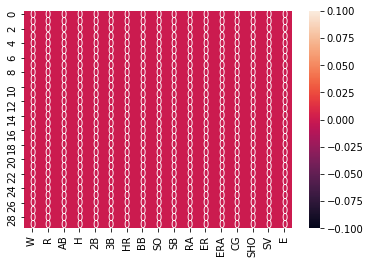

In [10]:
#data Visualization
#to check missing values
sns.heatmap(df.isnull(), annot=True)
plt.show()

In [11]:
df.isnull().sum()

W      0
R      0
AB     0
H      0
2B     0
3B     0
HR     0
BB     0
SO     0
SB     0
RA     0
ER     0
ERA    0
CG     0
SHO    0
SV     0
E      0
dtype: int64

In [12]:
df_corr = df.corr()
print(df_corr.head())

           W         R        AB         H        2B        3B        HR  \
W   1.000000  0.430751 -0.087947  0.037612  0.427797 -0.251118  0.307407   
R   0.430751  1.000000  0.319464  0.482856  0.560084 -0.070072  0.671283   
AB -0.087947  0.319464  1.000000  0.739122  0.453370  0.435422 -0.066983   
H   0.037612  0.482856  0.739122  1.000000  0.566847  0.478694 -0.090855   
2B  0.427797  0.560084  0.453370  0.566847  1.000000  0.220490  0.056292   

          BB        SO        SB        RA        ER       ERA        CG  \
W   0.484342  0.111850 -0.157234 -0.812952 -0.809435 -0.819600  0.080533   
R   0.402452 -0.054726  0.081367 -0.041623 -0.041245 -0.049281  0.232042   
AB -0.136414 -0.106022  0.372618  0.316010  0.309686  0.255551 -0.080876   
H  -0.118281 -0.398830  0.413444  0.224324  0.252489  0.231172  0.147955   
2B  0.302700 -0.150752  0.195027 -0.218160 -0.235531 -0.254854  0.306675   

         SHO        SV         E  
W   0.471805  0.666530 -0.089485  
R  -0.103274 -0.

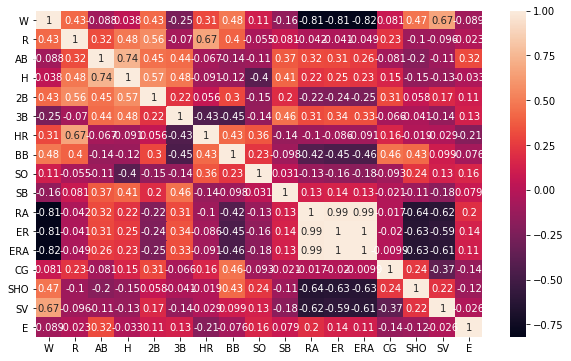

In [13]:
plt.figure(figsize=(10,6))
sns.heatmap(df_corr,annot=True)

In [14]:
#Plotting outliers using plot.box
df.columns

Index(['W', 'R', 'AB', 'H', '2B', '3B', 'HR', 'BB', 'SO', 'SB', 'RA', 'ER',
       'ERA', 'CG', 'SHO', 'SV', 'E'],
      dtype='object')

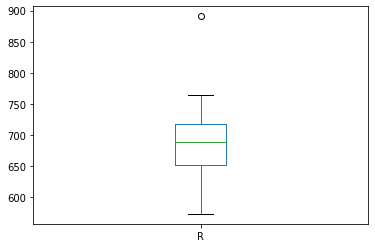

In [15]:
df['R'].plot.box()

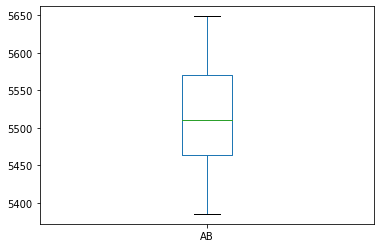

In [16]:
df['AB'].plot.box()

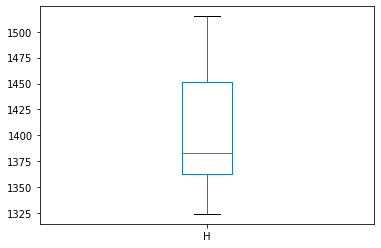

In [17]:
df['H'].plot.box()

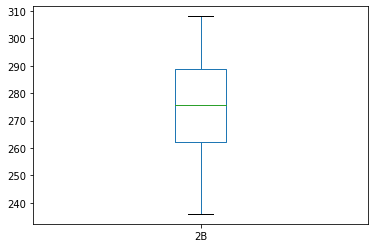

In [18]:
df['2B'].plot.box()

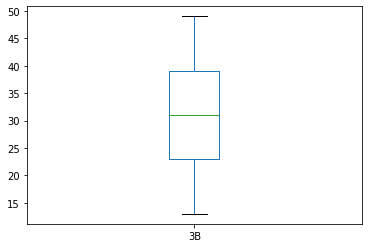

In [19]:
df['3B'].plot.box()

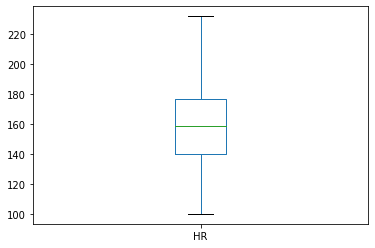

In [20]:
df['HR'].plot.box()

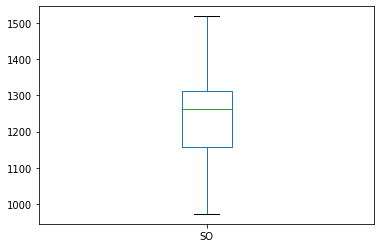

In [21]:
df['SO'].plot.box()

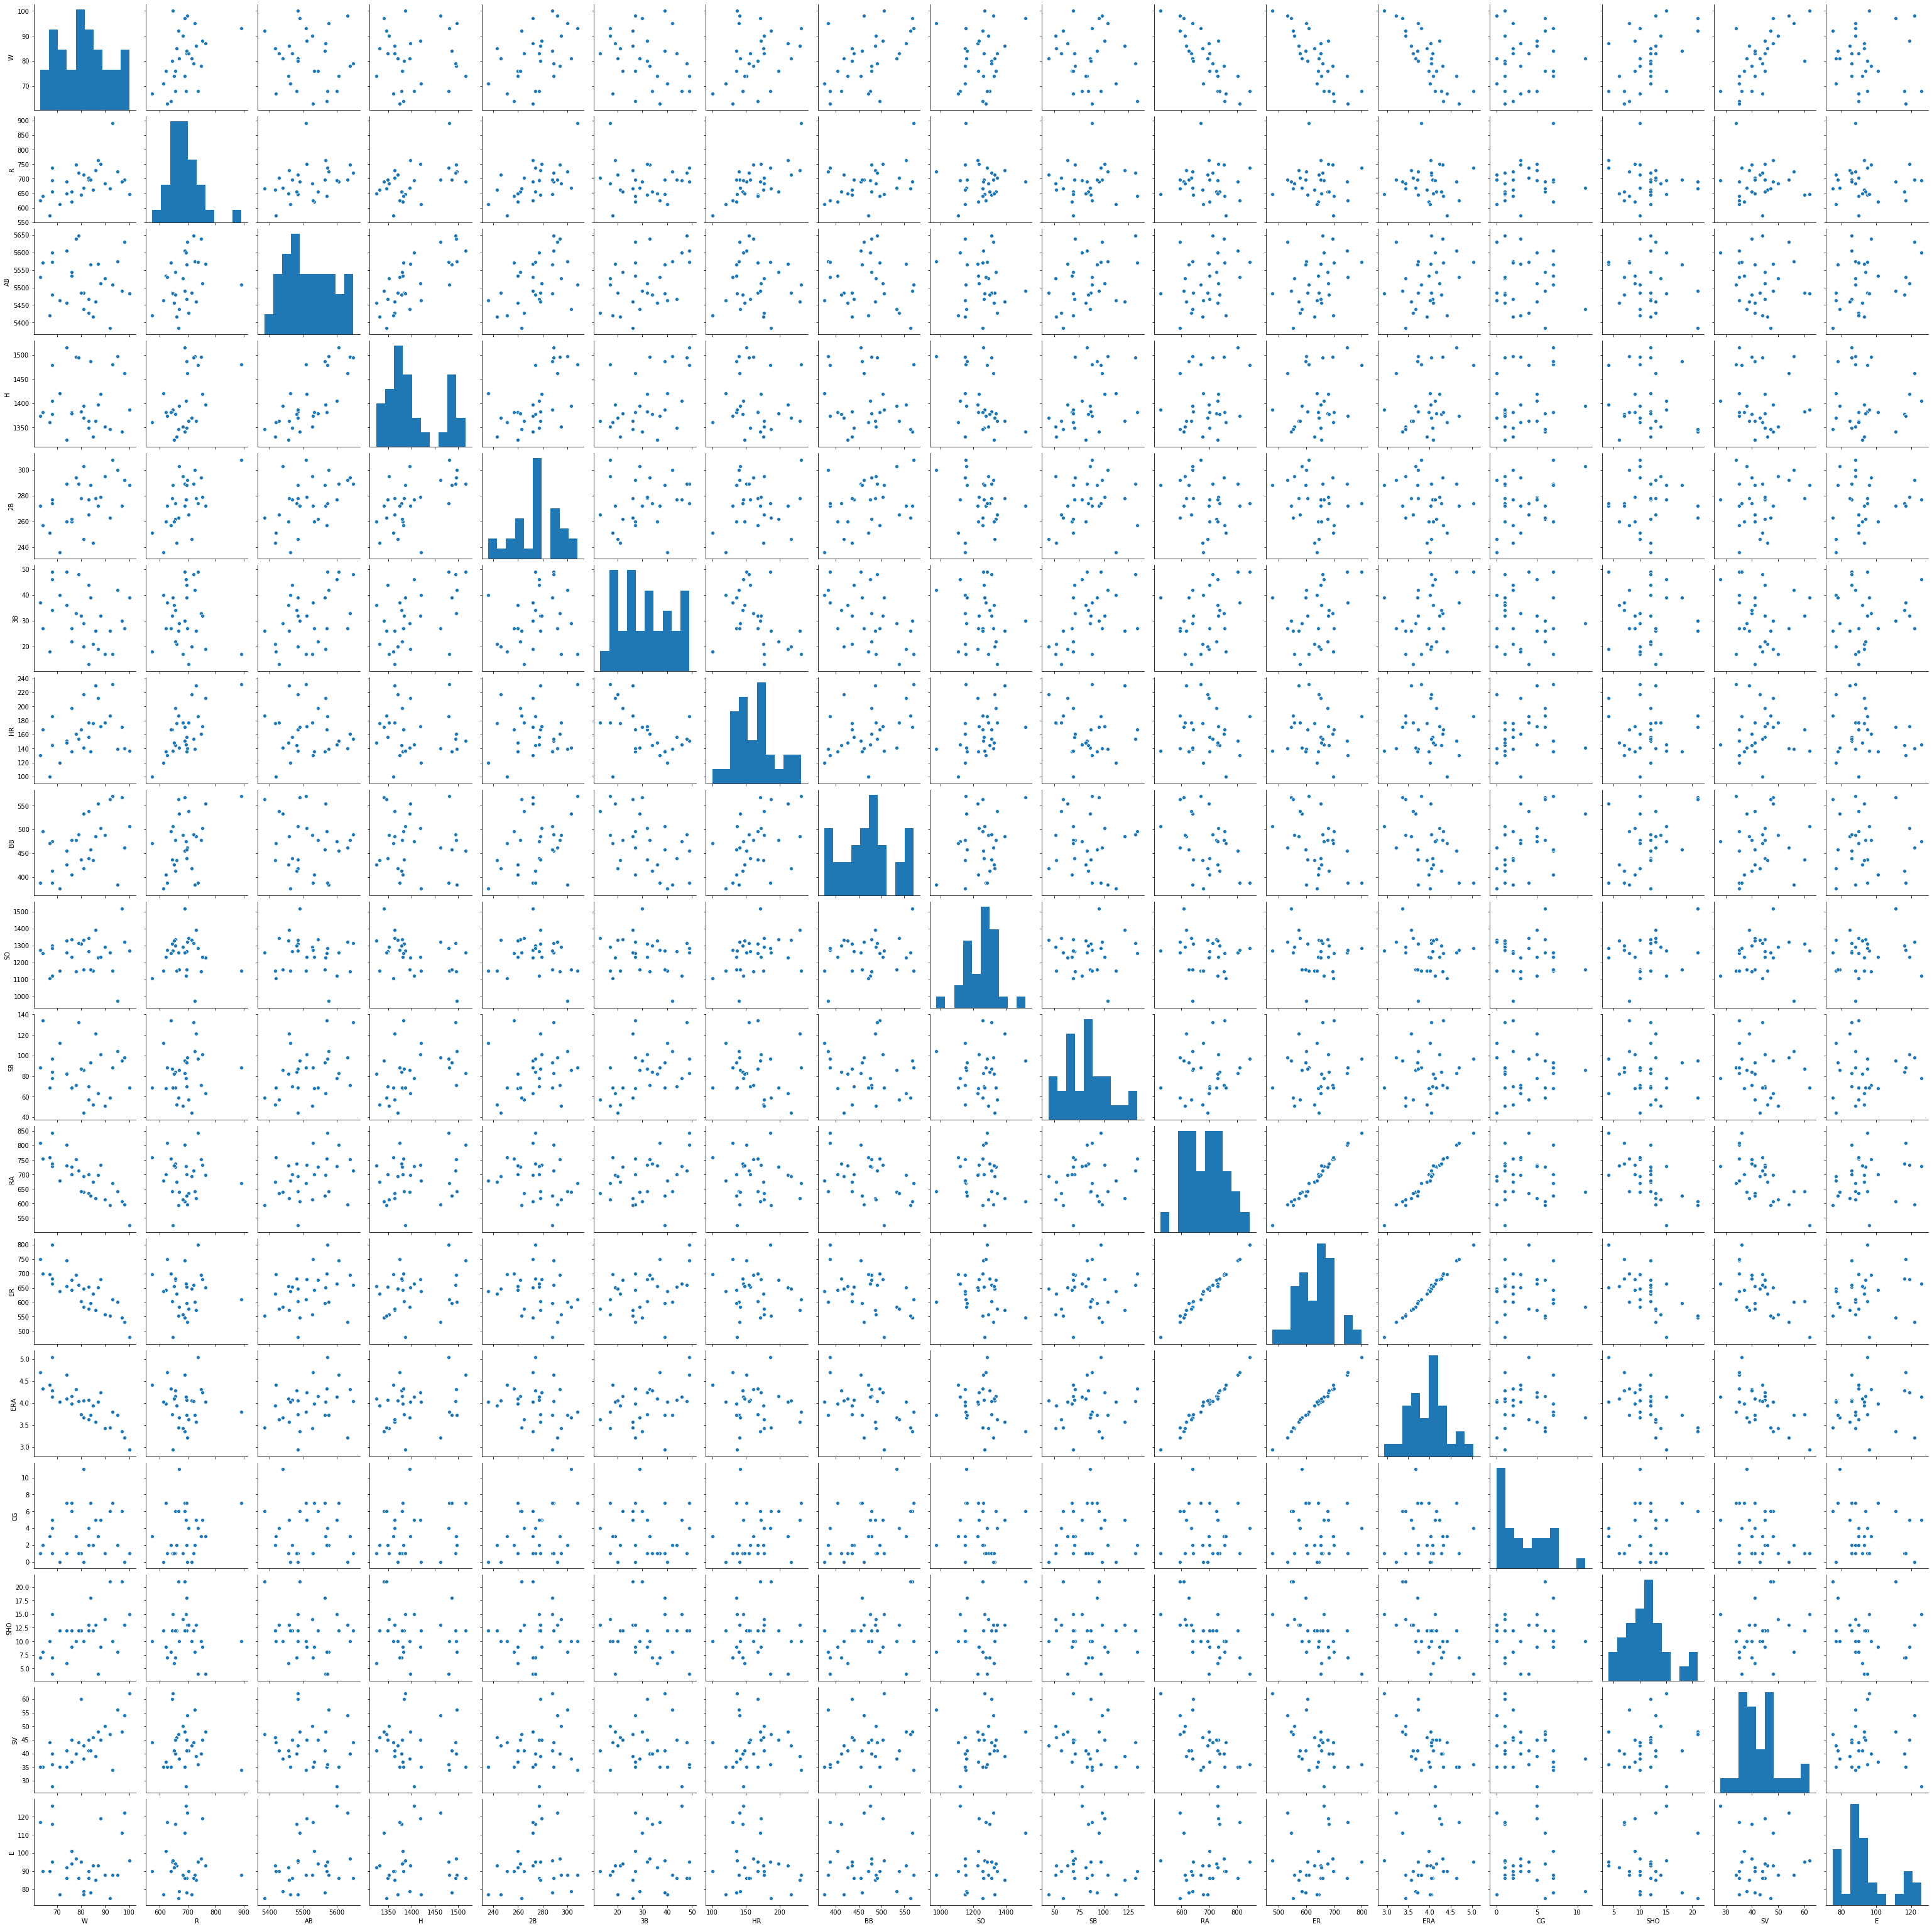

In [22]:
sns.pairplot(df)

In [23]:
#cheking skewness
#Plot all in one rows
collist = df.columns.values
print(collist)
ncol = 17
nrows = 30

['W' 'R' 'AB' 'H' '2B' '3B' 'HR' 'BB' 'SO' 'SB' 'RA' 'ER' 'ERA' 'CG' 'SHO'
 'SV' 'E']


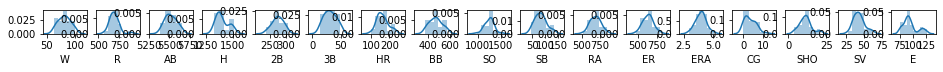

In [24]:
plt.figure(figsize=(16,16))
for i in range(0,len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.distplot(df[collist[i]])

In [25]:
df.skew()

W      0.047089
R      1.200786
AB     0.183437
H      0.670254
2B    -0.230650
3B     0.129502
HR     0.516441
BB     0.158498
SO    -0.156065
SB     0.479893
RA     0.045734
ER     0.058710
ERA    0.053331
CG     0.736845
SHO    0.565790
SV     0.657524
E      0.890132
dtype: float64

In [26]:
for col in df.columns:
    if df.skew().loc[col]>0.55:
        df[col] = np.log1p(df[col])

In [27]:
df.skew()

W      0.047089
R      0.744813
AB     0.183437
H      0.628584
2B    -0.230650
3B     0.129502
HR     0.516441
BB     0.158498
SO    -0.156065
SB     0.479893
RA     0.045734
ER     0.058710
ERA    0.053331
CG    -0.325962
SHO   -0.589640
SV     0.163057
E      0.632916
dtype: float64

In [28]:
#removing outliers
from scipy.stats import zscore
z =abs(zscore(df))
print(df.shape)
df_fin = df.loc[(z<3).all(axis=1)]
print(df_fin.shape)

(30, 17)
(29, 17)


In [29]:
df_x = df_fin.drop(columns=['W'])
y = df_fin[['W']]

In [30]:
sc = preprocessing.StandardScaler()
x = sc.fit_transform(df_x)
x = pd.DataFrame(x,columns=df_x.columns)

In [31]:
x.skew()

R     -0.388428
AB     0.169573
H      0.738455
2B    -0.335304
3B     0.090124
HR     0.450862
BB     0.151193
SO    -0.233815
SB     0.494966
RA     0.018155
ER     0.018461
ERA    0.016693
CG    -0.275681
SHO   -0.598073
SV     0.109983
E      0.586101
dtype: float64

In [32]:
def max2_score(regr, df_x, y):
    max_r_score= 0 
    for r_state in range(42,100):
        x_train,x_test, y_train,y_test = train_test_split(x,y, random_state = r_state, test_size=0.20)
        regr.fit(x_train,y_train)
        y_pred = regr.predict(x_test)
        r2_scr = r2_score(y_test,y_pred)
        print("r2 score corespond to random state: ",r_state , "is : ", r2_scr)
        if r2_scr>max_r_score:
            max_r_score=r2_scr
            final_r_state = r_state
    print("max r2 score coreesponding to ",final_r_state," is ",max_r_score)
    return final_r_state

In [33]:
#test Linear Regression model
from sklearn.linear_model import LinearRegression 
lreg = LinearRegression()
r_state = max2_score(lreg, x, y)

r2 score corespond to random state:  42 is :  0.3825859475807142
r2 score corespond to random state:  43 is :  -3.9843490626294473
r2 score corespond to random state:  44 is :  0.316398626215314
r2 score corespond to random state:  45 is :  0.03398425142875561
r2 score corespond to random state:  46 is :  0.7559749334265242
r2 score corespond to random state:  47 is :  -0.38489875561051656
r2 score corespond to random state:  48 is :  -0.47952837900942935
r2 score corespond to random state:  49 is :  -0.35224349632843266
r2 score corespond to random state:  50 is :  0.7396594059604645
r2 score corespond to random state:  51 is :  0.6678854398794463
r2 score corespond to random state:  52 is :  0.4091095300751535
r2 score corespond to random state:  53 is :  0.2529900538815295
r2 score corespond to random state:  54 is :  -0.13496658617173374
r2 score corespond to random state:  55 is :  0.7380124806405968
r2 score corespond to random state:  56 is :  0.6885715570367426
r2 score corespo

In [34]:
#cross validation score 
print("mean r2 score for Linear Regression " ,cross_val_score(lreg,x,y,cv=5, scoring="r2").mean())
print("std r2 score for Linear Regression " ,cross_val_score(lreg,x,y,cv=5, scoring="r2").std())

mean r2 score for Linear Regression  -0.035577078029890984
std r2 score for Linear Regression  0.6104439003422019


In [35]:
#max r2 score we get at random_state = 73
x_train,x_test, y_train,y_test = train_test_split(x,y,random_state=73,test_size=0.20)
lreg = linear_model.LinearRegression()
lreg.fit(x_train,y_train)
y_pred = lreg.predict(x_test)

In [36]:
print("r2 score is:", r2_score(y_test,y_pred))
print("RMSE is:", np.sqrt(mean_squared_error(y_test,y_pred)))

r2 score is: 0.845448797217738
RMSE is: 4.532375834277462


In [37]:
from sklearn.externals import joblib
joblib.dump(lreg, 'baseballcasestudy.pkl')

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\joblib\__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


['baseballcasestudy.pkl']

So max r2 score coreesponding to  73  is  0.845448797217738.  So possibility of wins is 0.845448797217738